### MAP556, Ecole Polytechnique, 2020-21

# TP 9 - Méthode de Monte-Carlo multi-niveaux


L'objectif de ce TP est d'illustrer numériquement les résultats vus en cours sur la méthode de Monte Carlo multi-niveaux.

### Exercice. Estimateur multi-niveaux à partir du schéma d'Euler

On reprend le processus $S$ introduit dans l'Exercice 2 du TP8:

$$
dS_t = r \, S_tdt + \sigma \, S_t dW_t,
\qquad S_0=s_0>0,
\qquad r,\sigma>0,
$$

1. Vérifier que le processus $S_t = s_0 e^{\sigma \, W_t + \left(r-\frac{\sigma^2}{2} \right)t}$, $t \ge 0$, satisfait l'équation ci-dessus. On admettra par la suite que ce processus est bien l'unique solution de l'EDS; c'est ce que l'on appelle un mouvement Brownien géométrique (MBG).


2. Écrire l'évolution du schéma d'Euler $(S^{(h)}_{kh})_{0\leq k\leq N}$ de pas $h$.

#### Estimation de $\mathbb{E}[f(S_T)]$ par la méthode Multi-niveaux

On considère maintenant l'application de la méthode Monte-Carlo multi-niveaux  à l'évaluation de 

$$\mathbb{E}[f(S_T)]$$
où $f(s)=(K-s)^+$ pour $s \ge 0$ et $K$ est une constante positive fixée.

__Estimateur.__ On rappelle que l'estimateur multi-niveaux basé sur les schémas d'Euler de pas $h_l = \frac T {2^l}$ est donné par

$$
\widehat{f(S_T)}_{\mathrm{ML}}
= \frac1{M_0} \sum_{m=1}^{M_0} (K - S_T^{h_0,0,m})^+
+ \sum_{l=1}^L \frac1{M_l} \sum_{m=1}^{M_l}
\left( (K - S_T^{h_l, l, m})^+ - (K - S_T^{h_{l-1},l,m})^+ \right)
$$ 
où
- pour chaque $h$ et $l$, les $(S^{h,l,m})_{1 \le m \le M_l}$ sont des tirages indépendants du schéma d'Euler de pas $h$;
- tous les tirages sont indépendants entre un niveau $l$ et l'autre;
- les schémas $S^{h_l,l,m}$ et $S^{h_{l-1},l,m}$ sont construits à partir des mêmes accroissements Browniens.

On rappelle (voir cours 8) qu'en utilisant les propriétés de convergence du schéma d'Euler pour le processus $S$ (vitesse faible $=1$, vitesse forte $=1/2$), on peut montrer la majoration suivante pour l'erreur quadratique de l'estimateur multi-niveaux

$$
\mathbb{E} \Bigl[
\bigl(
\widehat{f(S_T)}_{\mathrm{ML}} - \mathbb{E}[(K - S_T)^+]
\bigr)^2 \Bigr]
\le
C \biggl( h_L^2 + \sum_{l=0}^L \frac{h_l}{M_l} \biggr)
\qquad \forall M_0, \dots, M_L,
$$

où $C$ est une constante positive indépendante de $L$ et des $M_l$.		

1. Déterminer le plus petit $L$ de telle manière à avoir $h_L^2 \le \varepsilon^2$, où $\varepsilon$ est un seuil de précision souhaité.
Pour rappel, la solution $(M_0, \dots, M_L)$ de
$$
\min_{M_0, \dots, M_L} \sum_{l=0}^L \frac{M_l}{h_l} \qquad \mbox{ t.q. } \qquad
\sum_{l=0}^L \frac{h_l}{M_l} = \varepsilon^2
$$
donne
$$
M_0 \sim_c \frac{|\log \varepsilon|}{\varepsilon^2},
\qquad
M_l = M_0 \, 2^{-l}.
$$
Quel est l'intérêt de la solution de ce problème?

2. En complétant le code ci-dessous, implémenter l'évolution entre les instants $t^{l-1}_k = T \frac{k}{2^{l-1}}$ et $t^{l-1}_{k+1} = T \frac{k+1}{2^{l-1}}$ d'une matrice *Se\_fin* (resp. *Se\_gr*) de taille $M_l\times P$ du schéma d'Euler de pas fin $\frac T{2^{l}}$ (resp. de pas grossier $\frac T{2^{l-1}}$) en utilisant les mêmes accroissements browniens, où $P \ge 1$ est le nombre de tirages indépendants de l'estimateur multi-niveaux.

Ajouter à la variable *estim\_multi* la somme
$\sum_{m = 1}^{M_l} \bigl( (K - S_T^{h_l,l,m})^+ - (K - S_T^{h_{l-1},l,m})^+ \bigr)$ divisée par $M_l$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

T = 1.
sig = 0.2
r = 0.05
S0 = 100.
K = 110

In [1]:
def estimMultiniveaux(eps, P):
    """
    Fonction qui renvoie un echantillon de P tirages iid de
    l'estimateur multi-niveaux ayant une precision cible
    d'ordre eps
    """    
    h_0 = T #pas initial
    
    ####################################################
    # Completer avec le calcul du nombre de niveaux L
    # et le nombre de tirages indep au niveau 0
    ####################################################
    L = int(np.abs(np.log(eps)) / np.log(2))
    M_0 = int(np.abs(np.log(eps)) / eps**2 )
    
    # array M_0 * P de gaussiennes
    g = np.random.randn(M_0, P)
    
    Se_gr = S0*(1. + r*h_0 + sig*np.sqrt(h_0)*g)

    # premier terme dans l'estimateur Multi-niveaux
    estim_multi = np.mean((K-Se_gr)*(K>Se_gr), axis=0)
    
    # Boucle sur le nombre L de niveaux
    for l in range(1,L+1):
        M_l = int(M_0/2.**l)
        
        ##########################################
        # Parametres du schema d'Euler de pas fin
        ##########################################
        h_fin = h_0/2.**l
        sig_fin = sig*np.sqrt(h_fin)
        
        Se_fin = S0*np.ones((M_l, P)) #schema d'Euler de pas fin
        Se_gr = S0*np.ones((M_l, P)) #schema d'Euler de pas grossier
        
        # Dans la boucle ci-dessous, on fait évoluer des array de taille M_l x P 
        # boucle sur le pas de temps grossier h_(l-1) au niveau l
        for k in range(2**(l-1)):
            g1 = np.random.randn(M_l, P)
            g2 = np.random.randn(M_l, P)
            ####################################################
            # Implementer l'evolution des schemas avec pas fin
            # et pas grossier
            ###################################################
            Se_fin = Se_fin * (1 + r*h_fin + sig* np.sqrt(h_fin) * g1)
            Se_fin = Se_fin * (1 + r*h_fin + sig* np.sqrt(h_fin) * g2)
            Se_gr = Se_gr * (1 + 2*r*h_fin + sig* np.sqrt(h_fin) * (g1+g2))
            
        ###################################################################
        # Ajouter a la variable estim_multi la contribution du terme
        # au niveau l
        # (la moyenne des differences entre les deux schemas)
        ###################################################################
        contribution = np.mean((K-Se_fin)*(K>Se_fin) - (K-Se_gr)*(K>Se_gr), axis=0)
        estim_multi = estim_multi + contribution
        
    return estim_multi

3. La cellule ci-dessous représente les histogrammes de $P=1000$ réalisations de l'estimateur Monte-Carlo multi-niveaux pour des niveaux de précision $\varepsilon$ divisés par $2$ d'un histogramme au suivant. La variable *erreur\_quadratique*
donne l'estimation empirique de l'erreur quadratique en fonction de $\varepsilon$, où l'espérance $\mathbb{E}[(K - S_T)^+]$ est calculée exactement à l'aide de la formule (dite de Black-Scholes)
$$
\mathbb{E}[(K-S_T)^+] = K \, {\cal N}(-d+\sigma\sqrt{T}) - s_0e^{rT} {\cal N}(-d)
\ \mbox{ où } \ d = \frac{\ln(s_0/K)+ (r+\frac{\sigma^2}2) T}{\sigma\sqrt{T}}
$$
et ${\cal N}(x)=\int_{-\infty}^xe^{-\frac{y^2}{2}}\frac{dy}{\sqrt{2\pi}}$.


L'erreur évolue-t-elle avec $\varepsilon$ conformément à ce qui est attendu?

erreur L^2 (eps=0.20) : 2.21
erreur L^2 (eps=0.10) : 0.93
erreur L^2 (eps=0.05) : 0.40


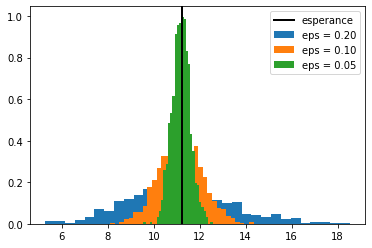

In [7]:
eps = 0.2 #precision cible
P = 1000 #nombre de tirages de l'estimateur

###################################################
# Formule explicite pour l'esperance E[(K-S_T)^+]
###################################################
d = (np.log(S0/K) + r*T) / (sig*np.sqrt(T)) + sig*np.sqrt(T)/2.
d2 = d - sig*np.sqrt(T)
esperance = K*norm.cdf(-d2) - S0*np.exp(r*T)*norm.cdf(-d)

plt.clf()

for i in range(3):
    estim_multi = estimMultiniveaux(eps,P)
    
    plt.hist(estim_multi, density="True", bins=int(np.sqrt(P)), label='eps = %1.2f' %(eps))
    
    #########################################################
    # Completer avec l'estimation empirique
    # de l'erreur quadratique
    erreur_quadratique = np.mean((estim_multi - esperance)**2)
    #########################################################
    print("erreur L^2 (eps=%1.2f) : %1.2f" %(eps, np.sqrt(erreur_quadratique)))
    
    eps = eps/2

plt.axvline(esperance, linewidth=2.0, color='k',label="esperance")
plt.legend(loc="best")